# <a style='color:blue'>Segmentez des clients d'un site e-commerce (Notebook 1: exploratoire)

- <a href="#C0">Introduction</a>


- <a href="#C1">1: Nettoyage du jeu de données</a>
    - <a href="#C11">1.1 Importation des jeux de données</a>
    - <a href="#C12">1.2 Sélection des jeux de données</a>
    - <a href="#C13">1.3 Qualité du jeu de données - valeurs manquantes</a>
    - <a href="#C14">1.4 Fusion des jeux de données</a>
    - <a href="#C15">1.5 Nettoyage des colonnes</a>    
    - <a href="#C16">1.6 Traitement des valeurs manquantes</a>
    - <a href="#C17">1.7 Traitement des doublons</a>
    - <a href="#C18">1.8 Validation des données nettoyées</a>

    
- <a href="#C2">2: Analyse exploratoire du jeu de données</a>
    - <a href="#C21">2.1 Commandes par date</a>
    - <a href="#C22">2.2 Commandes par client</a>
    - <a href="#C23">2.3 Montant par commande</a>
    - <a href="#C24">2.4 Review score par commande</a>

    
- <a href="#C3">3: Features engineering</a>
    - <a href="#C31">3.1 Création de features</a>
    - <a href="#C32">3.2 Fusion des nouvelles features</a>
    - <a href="#C33">3.3 Transformation de récence et passage au log de montant</a>    
    - <a href="#C34">3.4 Visualisation des features après transformation</a>
    - <a href="#C35">3.5 Export des données après feature engineering</a>

# <a name="C0">Introduction</a>

Olist, une entreprise brésilienne de e-commerce cherche à optimiser ses campagnes de communication.

L’équipe marketing nous demande de lui fournir une segmentation de ses clients, afin de mieux comprendre les différents types d’utilisateurs.

A partir de données de 2017 et 2018, nous allons tester différentes approches de modélisation, et déterminer la fréquence nécessaire de
mise à jour du meilleur modèle de segmentation.

Au préalable, un nettoyage et une analyse exploratoire sont nécessaires.

# <a name="C1">Partie 1: Nettoyage du jeu de données</a>

# <a name="C11">1.1: Importation des jeux de données</a>

Importation des librairies Numpy, Pandas, Pyplot, Missingno et du jeu de données (9 fichiers .csv)

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
cust=pd.read_csv('olist_customers_dataset.csv')
geo=pd.read_csv('olist_geolocation_dataset.csv')
order_items=pd.read_csv('olist_order_items_dataset.csv')
order_pay=pd.read_csv('olist_order_payments_dataset.csv')
order_reviews=pd.read_csv('olist_order_reviews_dataset.csv')
order_dataset=pd.read_csv('olist_orders_dataset.csv')
products_dataset=pd.read_csv('olist_products_dataset.csv')
sellers=pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation=pd.read_csv('product_category_name_translation.csv')

In [109]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [110]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [111]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [112]:
order_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [113]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [114]:
order_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [115]:
products_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [116]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [117]:
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


# <a name="C12">1.2 Sélection des jeux de données</a>

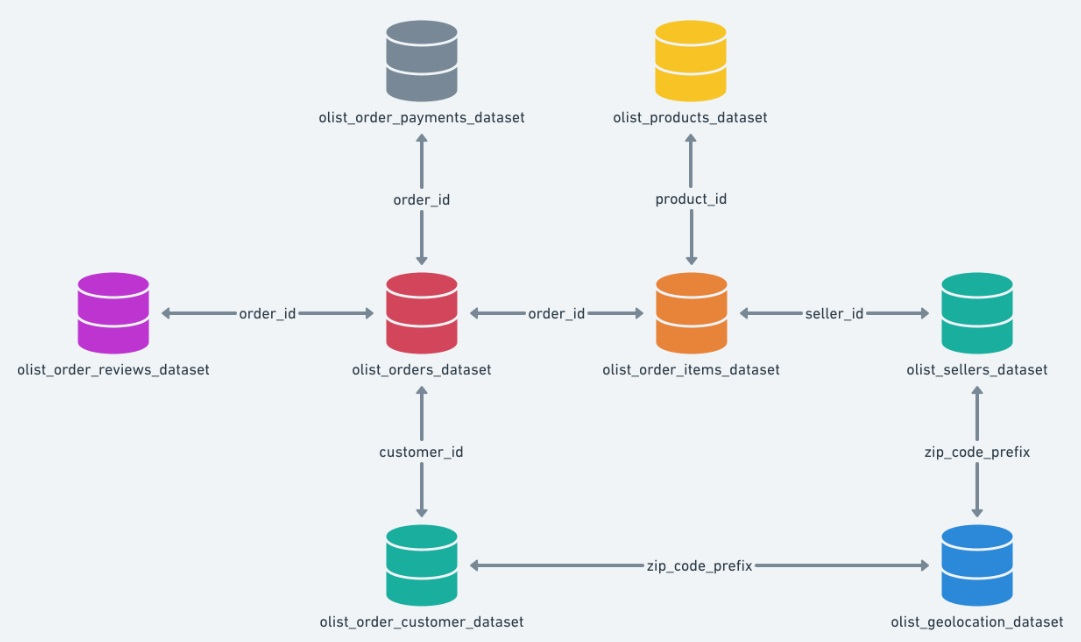

In [118]:
from IPython.display import Image
Image(filename="data schema.jpg")

Olist nous a fourni l'ensemble des données, mais seule une partie nous intéresse pour réaliser la segmentation demandée.

**Datasets sélectionnés:**
    
- olist_orders_dataset
- olist_order_customer_dataset: 
- olist_order_reviews_dataset
- olist_order_payments_dataset

# <a name="C13">1.3 Qualité des jeux de données - valeurs manquantes</a>

Visualisation des valeurs manquantes avec **Missingno**

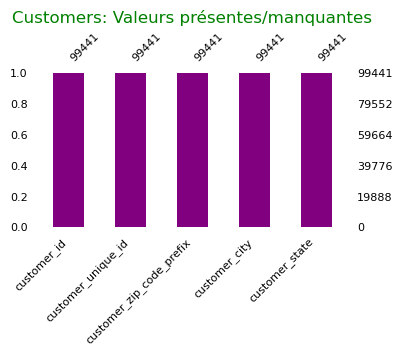

In [119]:
fig, ax = plt.subplots(figsize=(4,2))
msno.bar(cust, color="purple", ax=ax, fontsize=8)
ax.set_title("Customers: Valeurs présentes/manquantes")
ax.title.set_color('green')
ax.title.set_size(12)
plt.show()

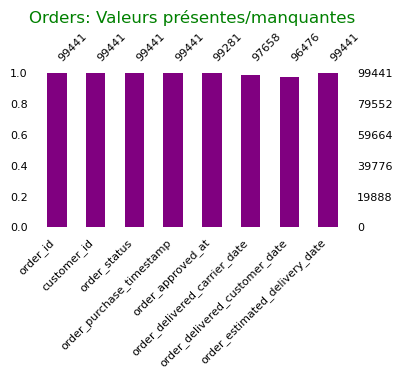

In [120]:
fig, ax = plt.subplots(figsize=(4,2))
msno.bar(order_dataset, color="purple", ax=ax, fontsize=8)
ax.set_title("Orders: Valeurs présentes/manquantes")
ax.title.set_color('green')
ax.title.set_size(12)
plt.show()

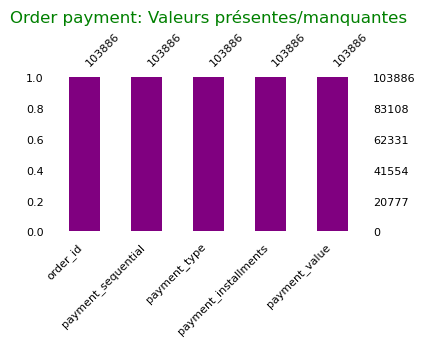

In [121]:
fig, ax = plt.subplots(figsize=(4,2))
msno.bar(order_pay, color="purple", ax=ax, fontsize=8)
ax.set_title("Order payment: Valeurs présentes/manquantes")
ax.title.set_color('green')
ax.title.set_size(12)
plt.show()

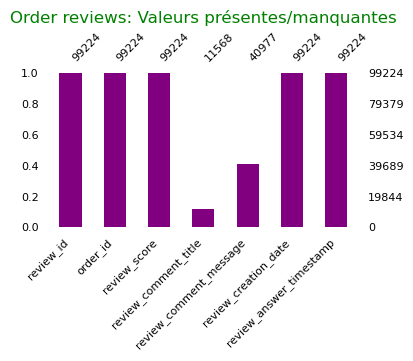

In [122]:
fig, ax = plt.subplots(figsize=(4,2))
msno.bar(order_reviews, color="purple", ax=ax, fontsize=8)
ax.set_title("Order reviews: Valeurs présentes/manquantes")
ax.title.set_color('green')
ax.title.set_size(12)
plt.show()

**La qualité des jeux de donnée est excellente**: très peu de valeurs manquantes pour les features importantes des datasets sélectionnés.

# <a name="C14">1.4 Fusion des jeux de données</a>

**- Order payment: aggrégation des paiements**

Certaines commandes ont été payées avec plusieurs moyens de paiement. Ajoutons les paiements de chaque commande: 

In [123]:
sum_payments=order_pay.groupby('order_id')['payment_value'].sum()

In [124]:
sum_payments.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214     72.19
00018f77f2f0320c557190d7a144bdd3    259.83
000229ec398224ef6ca0657da4fc703e    216.87
00024acbcdf0a6daa1e931b038114c75     25.78
00042b26cf59d7ce69dfabb4e55b4fd9    218.04
Name: payment_value, dtype: float64

In [125]:
sum_payments.info()

<class 'pandas.core.series.Series'>
Index: 99440 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Series name: payment_value
Non-Null Count  Dtype  
--------------  -----  
99440 non-null  float64
dtypes: float64(1)
memory usage: 1.5+ MB


On a 99440 commandes payées

In [126]:
sum_payments.info()

<class 'pandas.core.series.Series'>
Index: 99440 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Series name: payment_value
Non-Null Count  Dtype  
--------------  -----  
99440 non-null  float64
dtypes: float64(1)
memory usage: 1.5+ MB


**- Fusion de order_pay avec orders**

In [127]:
order_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [128]:
# fusion des commandes payées avec le df order, en ne gardant que les commandes payées
data1=pd.merge(sum_payments, order_dataset, on='order_id',how='left')

In [129]:
data1.shape

(99440, 9)

In [130]:
data1.head()

,order_id,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


**- Fusion avec reviews**

In [131]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [132]:
# Fusion avec order_reviews, en ne gardant que les commandes avec review
data2=pd.merge(order_reviews, data1, on='order_id',how='left')

In [133]:
data2.shape

(99224, 15)

In [134]:
data2.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,397.26,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,88.09,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,194.12,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,222.84,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1333.25,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00


**- Fusion avec customers**

In [135]:
# Fusion avec customers, en ne gardant que les commandes avec review
data3=pd.merge(data2, cust, on='customer_id',how='left')

In [136]:
data3.shape

(99224, 19)

On a 99224 commandes payées (somme faite si plusieurs moyens paiements), notées et rattachées à un customer_id

# <a name="C15">1.5 Nettoyage des colonnes</a>

Gardons uniquement les colonnes qui sont pertinentes pour effectuer la segmentation en nous focalisant sur les **features RFM** et les **notes de satisfaction** client pour le ciblage marketing.

- Segmentation de clients => **customer_unique_id** à conserver

- order_approved_at => pour déterminer la **RECENCE** (depuis la dernière commande)

- order_id => pour déterminer la **FREQUENCE** (nombre de commandes par client)

- payment_value => pour déterminer le **MONTANT** moyen des commandes d'un client

- review_score => pour déterminer le niveau de **satisfaction** d'un client

In [137]:
data3=data3.loc[:,['customer_unique_id', 'order_approved_at', 'order_id', 'payment_value', 'review_score']]
data3.head()

,customer_unique_id,order_approved_at,order_id,payment_value,review_score
0,68a5590b9926689be4e10f4ae2db21a8,2018-01-11 15:47:59,73fc7af87114b39712e6da79b0a377eb,397.26,4
1,64190b91b656ab8f37eb89b93dc84584,2018-02-28 12:48:39,a548910a1c6147796b98fdf73dbeba33,88.09,5
2,1d47144362c14e94ccdd213e8ec277d5,2018-02-03 10:33:41,f9e4b658b201a9f2ecdecbb34bed034b,194.12,5
3,c8cf6cb6b838dc7a33ed199b825e8616,2017-04-09 17:55:19,658677c97b385a9be170737859d3511b,222.84,5
4,d16000272660a1fef81482ad75ba572a,2018-02-10 15:48:21,8e6bfb81e283fa7e4f11123a3fb894f1,1333.25,5


In [138]:
data3.shape

(99224, 5)

# <a name="C16">1.6 Traitement des valeurs manquantes</a>

In [139]:
# Suppression des clients avec 'customer_unique_id'=NaN
data3=data3[~data3['customer_unique_id'].isnull()]
data3.shape

(99223, 5)

In [140]:
# Suppression des clients avec 'order_approved_at'=NaT
data3=data3[~data3['order_approved_at'].isnull()]
data3.shape

(99067, 5)

# <a name="C17">1.7 Traitement des doublons</a>

- **Doublon au sein de la variable 'customer_unique_id'**

In [141]:
data3['customer_unique_id'].duplicated().sum()

3783

Un client unique peut avoir effectué plusieurs commandes => il y a autant de lignes que de commandes dans le dataframe => pas de traitement nécessaire à ce stade

- **Doublons au sein de la variable 'order_id'**

In [142]:
data3.loc[data3['order_id'].duplicated(),:]

,customer_unique_id,order_approved_at,order_id,payment_value,review_score
1119,8746f1ba2e19bcf8bc03a946a0923d78,2017-10-20 23:14:10,5040757d4e06a4be96d3827b860b4e7c,253.65,5
3109,21effa61d72771ba8315ab56ce7fb7ac,2018-01-12 02:38:33,cf73e2cb1f4a9480ed70c154da3d954a,61.85,5
8108,a66315c850c3712707754c1eca7a8069,2018-03-15 13:10:43,e1bc1083cd7acd30d0576335373b907d,335.00,5
9064,0cc2ee1112a11a1094eff52fa2e87150,2017-10-03 12:07:18,c7cfea0c153e6382e32e84c2a9dd7d2e,81.22,5
9795,08f7cf00ed9ff3e0a08fc136ec272974,2017-09-02 22:23:53,f9c78e6e58306dc81efbbada1ac11f24,215.84,3
...,...,...,...,...,...
98989,271d3cdd872021b1b6669ad93e8b856b,2018-02-13 16:50:30,c0db7d31ace61fc360a3eaa34dd3457c,65.71,5
99108,5b2c2b2a8d9e890debe309928d321f20,2017-06-26 11:55:25,42ae1967f68c90bb325783ac55d761ce,135.49,4
99164,b1a8a0800eac99ec4d83d6ca350a690e,2018-02-23 09:20:21,c5334d330e36d2a810a7a13c72e135ee,183.98,5
99178,5efcc46e1fee22373a28eb2b0f26a6fc,2017-05-16 13:10:13,a7dbcf5043158d6fa72859eead2f3d10,107.78,4


In [143]:
# Suppression des doublons
data3.drop_duplicates(subset=['order_id'], inplace=True)
data3.shape

(98517, 5)

# <a name="C18">1.8 Validation des données nettoyées</a>

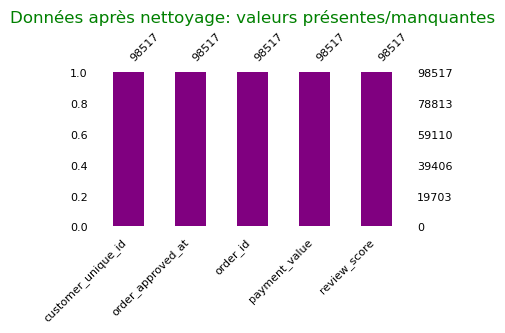

In [144]:
fig, ax = plt.subplots(figsize=(4,2))
msno.bar(data3, color="purple", ax=ax, fontsize=8)
ax.set_title("Données après nettoyage: valeurs présentes/manquantes")
ax.title.set_color('green')
ax.title.set_size(12)
plt.show()

In [145]:
data3.describe()

,payment_value,review_score
count,98517.000000,98517.000000
mean,160.630936,4.089020
std,220.279542,1.345579
min,9.590000,1.000000
25%,61.940000,4.000000
50%,105.280000,5.000000
75%,176.780000,5.000000
max,13664.080000,5.000000


# <a name="C2">Partie 2: Analyse exploratoire</a>

# <a name="C21">2.1: Commandes par date</a>

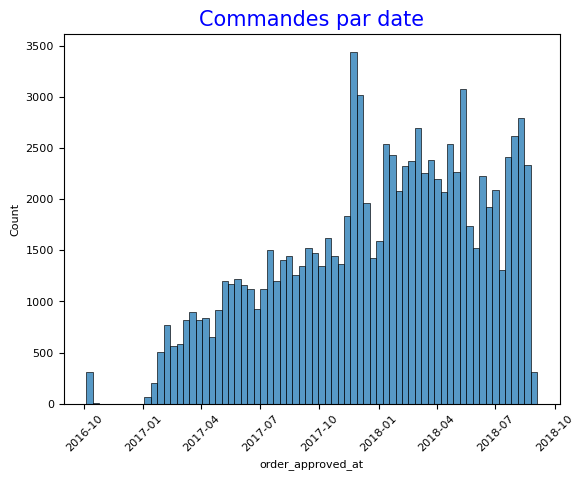

In [146]:
# Conversion de la variable 'order_approved_at' en date 
data3['order_approved_at'] = pd.to_datetime(data3['order_approved_at'])

sns.histplot(data=data3, x='order_approved_at')
plt.title('Commandes par date', fontsize=15, color="blue")
plt.xticks(rotation=45)
plt.show()

# <a name="C22">2.2: Commandes par client</a>

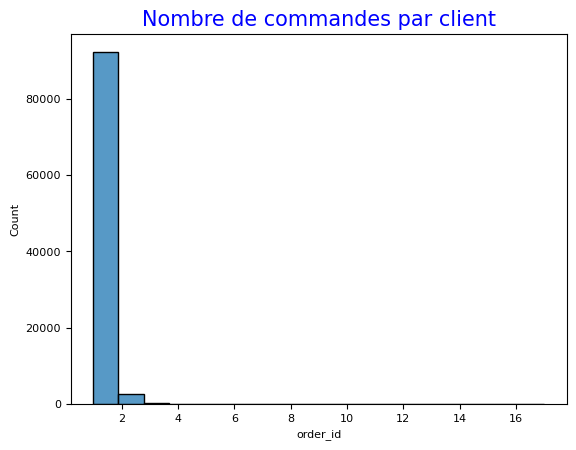

In [147]:
cust_unique_freq=data3.groupby('customer_unique_id')['order_id'].count()

sns.histplot(data=cust_unique_freq)
plt.title('Nombre de commandes par client', fontsize=15, color="blue")
plt.show()

In [148]:
cust_unique_freq.value_counts()

1     92381
2      2669
3       185
4        30
5         8
6         6
7         3
9         1
17        1
Name: order_id, dtype: int64

Seulement 3 % des clients du fichier de données partagé par Olist ont réalisé plusieurs commandes

# <a name="C23">2.3 Montant par commande</a>

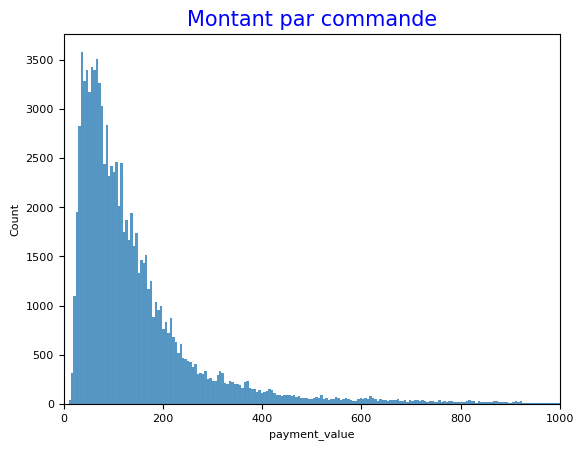

In [149]:
sns.histplot(data=data3, x='payment_value')
plt.xlim(0, 1000)
plt.title('Montant par commande', fontsize=15, color="blue")
plt.show()

On a une distribution unimodale avec un pic autour de 70 euros

# <a name="C24">2.4 Review score par commande</a>

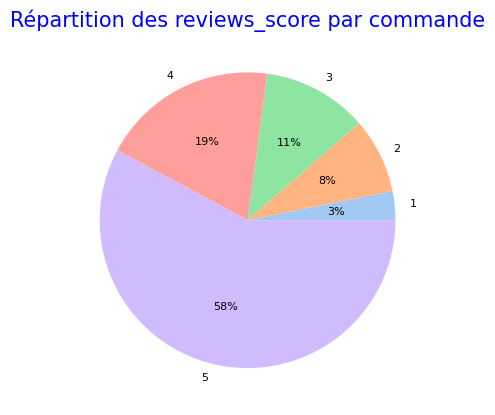

In [150]:
mylabels = ["1", "2", "3", "4", "5"]
y=data3.groupby('review_score').count()['customer_unique_id'].sort_values(ascending=True)[:5]
colors = sns.color_palette('pastel') [0:5]
plt.title('Répartition des reviews_score par commande', fontsize=15, color="blue")
plt.pie(y, labels = mylabels, colors = colors, autopct='%.0f%%')
plt.rcParams.update({'font.size': 8})
plt.show()

Le niveau général de satisfaction est élevé: 77% des clients sont très satisfaits ou satisfaits

# <a name="C3">Partie 3: Features engineering</a>

# <a name="C31">3.1 Création de features</a>

In [151]:
#Calcul de la date de dernier achat par client unique
cust_unique_last_order=data3.groupby('customer_unique_id')['order_approved_at'].max()

# Calcul du nombre de commandes par client unique
cust_unique_freq=data3.groupby('customer_unique_id')['order_id'].count()

# Calcul du montant moyen de commandes par client unique
cust_unique_pay=data3.groupby('customer_unique_id')['payment_value'].mean()

# Calcul du review_score moyen par client unique
cust_unique_score=data3.groupby('customer_unique_id')['review_score'].mean()

# <a name="C32">3.2 Fusion des nouvelles features</a>

In [152]:
# Fusion de récence et fréquence
data=pd.merge(cust_unique_last_order, cust_unique_freq, on='customer_unique_id', how='left')

# Fusion de récence-fréquence avec montant
data=pd.merge(data, cust_unique_pay, on='customer_unique_id', how='left')

# Fusion de récence-fréquence-montant avec review_score
data=pd.merge(data, cust_unique_score, on='customer_unique_id', how='left')

# Sélection des données à conserver
data.loc[:,['order_approved_at', 'order_id', 'payment_value', 'review_score', 'order_approved_at']]

#Renommage des colonnes => nouvelles features
data=data.rename(columns={'order_approved_at': 'récence', 'order_id': 'fréquence', 'payment_value':'montant'})

# Ajout de la colonne 'order_approved_at'
data['order_approved_at']=data['récence']
data

,récence,fréquence,montant,review_score,order_approved_at
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,1,141.90,5.0,2018-05-10 11:11:18
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,1,27.19,4.0,2018-05-07 18:25:44
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22,3.0,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,1,43.62,4.0,2017-10-12 20:49:17
0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,1,196.89,5.0,2017-11-14 20:06:52
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,1,2067.42,5.0,2017-06-08 21:15:16
fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,1,84.58,4.0,2017-12-10 20:16:20
ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,1,112.46,5.0,2017-02-07 16:02:44


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95284 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   récence            95284 non-null  datetime64[ns]
 1   fréquence          95284 non-null  int64         
 2   montant            95284 non-null  float64       
 3   review_score       95284 non-null  float64       
 4   order_approved_at  95284 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 4.4+ MB


# <a name="C33">3.3 Transformation de récence et passage au log de montant</a>

In [154]:
def feat_eng (df):
    """
    Fonction qui transforme 'order_approved_at' en un score de récence de 1 à 10 (nb jours depuis le dernier achat).
    10 correspond à un achat très récent.
    :param df: DataFrame contenant les données à transformer
    :return: DataFrame avec la colonne 'récence' mise à jour et le montant passé au log
    """
    # Récupération de la date globale la plus récente 'order_approved_at' dans tout le dataset
    date_max=df['order_approved_at'].max()
    date_min=df['order_approved_at'].min()
    
    # Conversion de 'order_approved_at' en Timedelta en jours, heures, minutes, secondes (entre latest et le dernier achat d'un client))
    Nbdays=(date_max-df['order_approved_at']).dt.days
    Nbdays_max=(date_max-date_min).days

    # Calcul de la récence en jours
    Récence= Nbdays_max - Nbdays
    df['récence']=Récence
    
    # Calcul de la récence (de 1 à 10) en fonction des quantiles de distribution. Utilisation de qcut pour diviser la colonne en 10 quantiles
    df['récence'] = pd.qcut(df['order_approved_at'], q=10, labels=False) + 1

    # Passage au log de payment value
    df['montant']=np.log(df['montant']+1)
        
    return df

In [155]:
feat_eng(data)

,récence,fréquence,montant,review_score,order_approved_at
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,8,1,4.962145,5.0,2018-05-10 11:11:18
0000b849f77a49e4a4ce2b2a4ca5be3f,8,1,3.338967,4.0,2018-05-07 18:25:44
0000f46a3911fa3c0805444483337064,1,1,4.468434,3.0,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,3,1,3.798182,4.0,2017-10-12 20:49:17
0004aac84e0df4da2b147fca70cf8255,4,1,5.287711,5.0,2017-11-14 20:06:52
...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,1,7.634540,5.0,2017-06-08 21:15:16
fffea47cd6d3cc0a88bd621562a9d061,5,1,4.449452,4.0,2017-12-10 20:16:20
ffff371b4d645b6ecea244b27531430a,1,1,4.731450,5.0,2017-02-07 16:02:44


# <a name="C34">3.4 Visualisation des features après transformation</a>

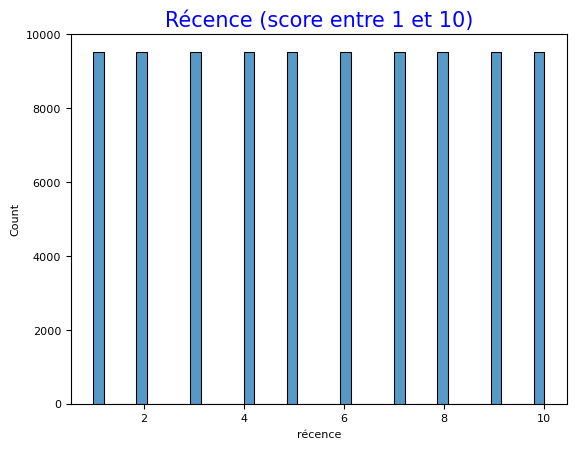

In [156]:
sns.histplot(data=data, x='récence')
plt.title('Récence (score entre 1 et 10)', fontsize=15, color="blue")
plt.show()

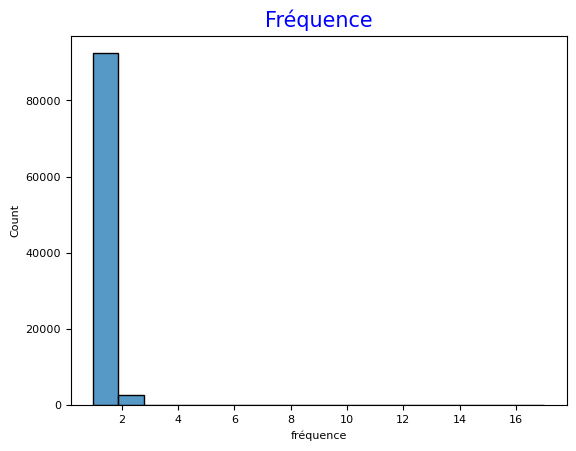

In [157]:
sns.histplot(data=data, x='fréquence')
plt.title('Fréquence', fontsize=15, color="blue")
plt.show()

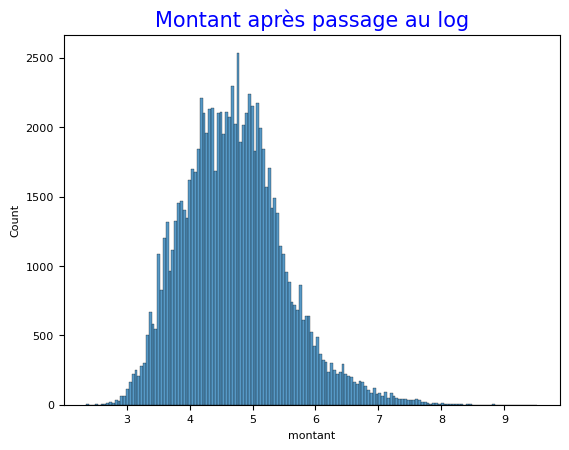

In [158]:
sns.histplot(data=data, x='montant')
plt.title('Montant après passage au log', fontsize=15, color="blue")
plt.show()

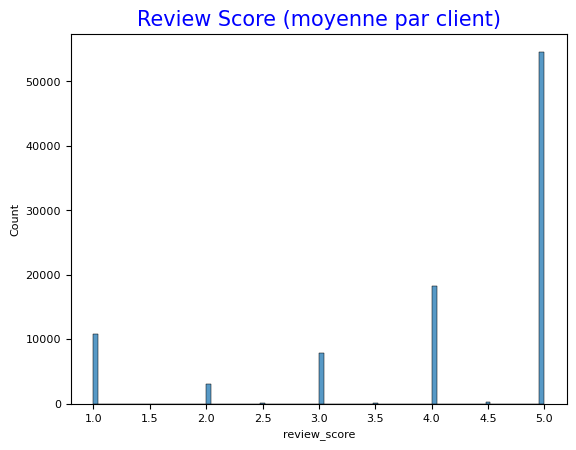

In [159]:
sns.histplot(data=data, x='review_score')
plt.title('Review Score (moyenne par client)', fontsize=15, color="blue")
plt.show()

# <a name="C35">3.5 Export des données après feature engineering</a>

In [160]:
data.to_csv('data_after_feat_eng.csv', index=True)